# **Import Required Libraries**

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.preprocessing import StandardScaler

# **Load and Prepare Data**

In [86]:
# Load the dataset
df = pd.read_csv('income.csv')

# Display basic info
print("Data shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# Separate features and target
X = df[['age', 'experience']].values
y = df['income'].values

Data shape: (20, 3)

First 5 rows:


,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


# **Multiple Linear Regression Class Definition (Statistical Approach)**

In [88]:
class MultipleLinearRegression:
    def __init__(self):
        """Initialize the regression model"""
        self.coefficients = None
        self.intercept = None
        self.X = None
        self.y = None
        self.residuals = None
        self.r_squared = None
        self.adj_r_squared = None
        self.mse = None

    def fit(self, X, y):
        """Fit the model using normal equation"""
        # Add intercept term
        X = np.column_stack((np.ones(X.shape[0]), X))

        # Calculate coefficients
        XTX = np.dot(X.T, X)
        XTX_inv = np.linalg.inv(XTX)
        XTy = np.dot(X.T, y)
        coefficients = np.dot(XTX_inv, XTy)

        self.intercept = coefficients[0]
        self.coefficients = coefficients[1:]

        # Calculate predictions and residuals
        y_pred = np.dot(X, coefficients)
        self.residuals = y - y_pred

        # Calculate R-squared
        ss_total = np.sum((y - np.mean(y))**2)
        ss_residual = np.sum(self.residuals**2)
        self.r_squared = 1 - (ss_residual / ss_total)

        # Calculate adjusted R-squared
        n, p = X.shape
        self.adj_r_squared = 1 - (1 - self.r_squared) * (n - 1) / (n - p - 1)

        # Store X and y for later use
        self.X = X
        self.y = y
        self.mse = ss_residual / (n - p - 1)
    # Predict
    def predict(self, X):
        """Predict using the linear regression model"""
        if self.coefficients is None:
            raise Exception("Model is not fitted yet.")

        # Add intercept column
        X = np.column_stack((np.ones(X.shape[0]), X))

        # Combine intercept and coefficients
        coefficients = np.concatenate(([self.intercept], self.coefficients))

        # Compute predictions
        return np.dot(X, coefficients)

# **Fit the Model and Display Results**

In [90]:
# Create and fit the model
mlr = MultipleLinearRegression()
mlr.fit(X, y)

# Display results
print("Regression Equation:")
print(f"Income = {mlr.intercept:.2f} + {mlr.coefficients[0]:.2f}*age + {mlr.coefficients[1]:.2f}*experience")
print("\nModel Evaluation:")
print(f"R-squared: {mlr.r_squared:.4f}")
print(f"Adjusted R-squared: {mlr.adj_r_squared:.4f}")
print(f"Mean Squared Error: {mlr.mse:.2f}")

Regression Equation:
Income = 31261.69 + -99.20*age + 2162.40*experience

Model Evaluation:
R-squared: 0.9773
Adjusted R-squared: 0.9731
Mean Squared Error: 1917042.47


## **Example of Prediction**

In [92]:
X = df[["age", "experience"]].values
y = df["income"].values

# Model training
mlr = MultipleLinearRegression()
mlr.fit(X, y)

# Predicting on new data
new_data = np.array([[30, 5], [45, 20]])
predictions = mlr.predict(new_data)
print("Predicted income:", predictions)

Predicted income: [39097.85014989 70045.98269684]


# **3D Visualization**

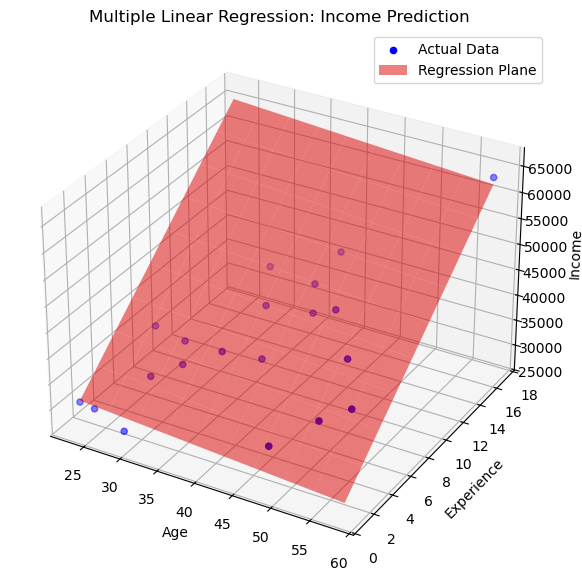

In [94]:
def plot_3d_regression(X, y, model):
    """Create 3D plot of data points and regression plane"""
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot actual data points
    ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o', label='Actual Data')

    # Create meshgrid for regression plane
    x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
    x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
    x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

    # Calculate predicted values for the plane
    y_pred = (model.intercept +
              model.coefficients[0] * x1_mesh +
              model.coefficients[1] * x2_mesh)

    # Plot regression plane
    ax.plot_surface(x1_mesh, x2_mesh, y_pred, alpha=0.5, color='r', label='Regression Plane')

    ax.set_xlabel('Age')
    ax.set_ylabel('Experience')
    ax.set_zlabel('Income')
    plt.title('Multiple Linear Regression: Income Prediction')
    plt.legend()
    plt.show()

plot_3d_regression(X, y, mlr)

# **ANOVA Analysis**

In [114]:
def anova_table(self):
    if self.B_0 is None or self.B_1 is None:
        raise ValueError("The model has not been fitted yet.")
    
    # Degrees of freedom
    self.df_regression = 1
    self.df_error = self.n - 2
    df_total = self.n - 1
    
    # Mean squares
    MSR = self.SSR / self.df_regression
    MSE = self.SSE / self.df_error
    
    # F-statistic
    self.F_stat = MSR / MSE
    
    # Assemble the ANOVA table
    anova_data = {
        'Source': ['Regression', 'Error', 'Total'],
        'Sum of Squares': [self.SSR, self.SSE, self.SST],
        'Degrees of Freedom': [self.df_regression, self.df_error, df_total],
        'Mean Square': [MSR, MSE, ""],
        'F-Statistic': [self.F_stat, "", ""]
    }
    
    anova_table = pd.DataFrame(anova_data)
    return anova_table

def hypothesis_test(self, alpha=0.05):
    # Calculate the critical value for the given significance level
    F_c = scipy.stats.f.ppf(1 - alpha, self.df_regression, self.df_error)

    # Determine the conclusion based on the F-statistic
    if self.F_stat > F_c:
        conclusion = ("Since F_0 > F_c, we reject the null hypothesis.\n"
                      "Therefore, there's a relationship between x and y.")
    else:
        conclusion = ("Since F_c > F_0, we don't reject the null hypothesis.\n"
                      "Therefore, there's no relationship between x and y.")
    
    # Print the results in a structured and visually appealing format
    print("=" * 45)
    print("         Hypothesis Testing Results           ")
    print("=" * 45)
    print(f"{'Null Hypothesis (H_0):':<25} B_1 = 0")
    print(f"{'Alternative Hypothesis (H_a):':<25} B_1 ≠ 0")
    print("-" * 45)
    print(f"{'F-statistic (F_0):':<25} {self.F_stat:.4f}")
    print(f"{'Critical value (F_c):':<25} {F_c:.4f}")
    print("-" * 45)
    print(f"{conclusion}")
    print("=" * 45)
